EDA for all output variables used in previous analysis

In [1]:
#Import packages
import pandas as pd
import glob

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

In [2]:
import os
os.getcwd()

'/home/nmvenuti/DSI_Religion/variableAnalysis'

In [3]:
################################
#####Import and clean data######
################################

#Define data filepath
dataPath='../modeling/ref_complete1/'


#Get Files and store in appropriate list
judgementList=glob.glob(dataPath+'signal_judgements*')
networkList=glob.glob(dataPath+'signal_network*')
semAcomList=glob.glob(dataPath+'signal_semACOM*')
semContextList=glob.glob(dataPath+'signal_semContext*')
sentimentList=glob.glob(dataPath+'signal_sentiment*')

In [4]:
#For each variable extract files and create total dataframe using only desired columns
judgementDF= pd.concat((pd.read_csv(fileName) for fileName in judgementList))[['group','avgPercJ','avgNumJ']].set_index('group')

networkDF= pd.concat((pd.read_csv(fileName) for fileName in networkList))[['group','subgraph_centrality','eigenvector_centrality']].set_index('group')

semAcomDF= pd.concat((pd.read_csv(fileName) for fileName in semAcomList))[['group','acom']].set_index('group')

semContextDF= pd.concat((pd.read_csv(fileName) for fileName in semContextList))[['groupName','t.cvCosineSim.']]
semContextDF=semContextDF.groupby('groupName').mean()
semContextDF.reset_index(inplace=True)
semContextDF.columns=['group','contextVec']
semContextDF=semContextDF.set_index('group')

sentimentDF= pd.concat((pd.read_csv(fileName) for fileName in sentimentList))[['group','X.PosWords','X.NegWords','X.PosDoc','X.NegDoc']].set_index('group')


In [5]:
#Merge dataframes into one based on groupname
signalDF=judgementDF.join([networkDF,semAcomDF,semContextDF,sentimentDF], how='left')
signalDF.reset_index(inplace=True)

In [6]:
#Add in group ranking
groupNameList=['WBC', 'PastorAnderson', 'NaumanKhan', 'DorothyDay', 'JohnPiper', 'Shepherd',
'Rabbinic', 'Unitarian', 'MehrBaba']
groupRankList=[1,2,3,4,4,4,6,7,8]

groupRankDF=pd.DataFrame([[groupNameList[i],groupRankList[i]] for i in range(len(groupNameList))],columns=['groupName','rank'])

signalDF['groupName']=signalDF['group'].map(lambda x: x.split('_')[0])

signalDF=signalDF.merge(groupRankDF, on='groupName')

In [7]:
##################################
#####Review Consolidated Data#####
##################################

signalDF.describe()

,avgPercJ,avgNumJ,subgraph_centrality,eigenvector_centrality,acom,contextVec,X.PosWords,X.NegWords,X.PosDoc,X.NegDoc,rank
count,328.000000,328.000000,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.435391,73.532791,1.164993e+01,0.050935,0.561953,0.989866,0.025489,0.019962,0.705048,0.294952,3.829268
std,0.074651,47.192794,1.145629e+01,0.064054,0.026696,0.002620,0.004098,0.003715,0.180230,0.180230,1.587835
min,0.293420,23.100000,-2.220446e-16,0.000000,0.509861,0.983356,0.016300,0.011700,0.166700,0.000000,1.000000
25%,0.363575,53.375000,5.402782e+00,0.011019,0.539984,0.987891,0.022200,0.017575,0.600000,0.200000,4.000000
50%,0.439530,61.150000,9.301497e+00,0.028519,0.564744,0.990243,0.025200,0.019300,0.700000,0.300000,4.000000
75%,0.486530,68.325000,1.475063e+01,0.056196,0.582565,0.992067,0.028525,0.022100,0.800000,0.400000,4.000000
max,0.604950,308.875000,1.263848e+02,0.370577,0.655933,0.994384,0.036400,0.032100,1.000000,0.833300,8.000000


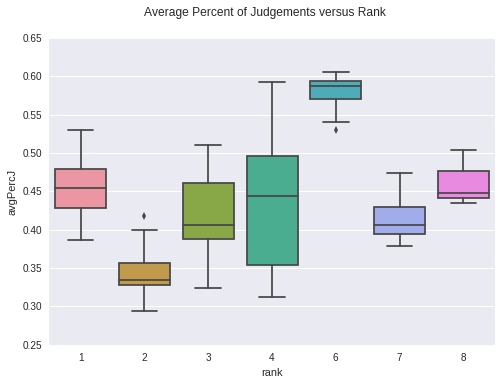

In [8]:
#Create box plots
ax = sns.boxplot(x='rank',y='avgPercJ',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Average Percent of Judgements versus Rank') 

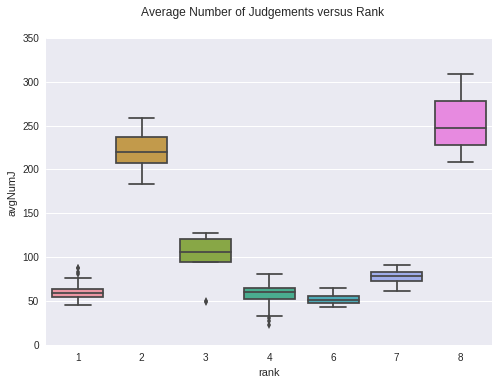

In [9]:
ax = sns.boxplot(x='rank',y='avgNumJ',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Average Number of Judgements versus Rank') 

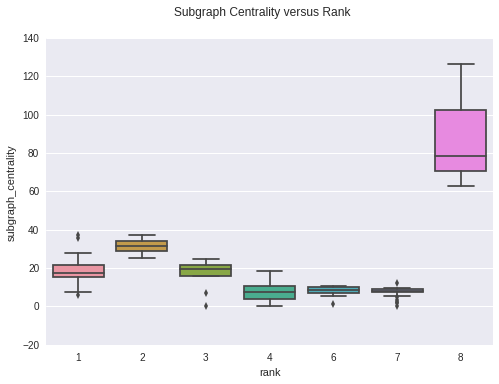

In [10]:
ax = sns.boxplot(x='rank',y='subgraph_centrality',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Subgraph Centrality versus Rank') 

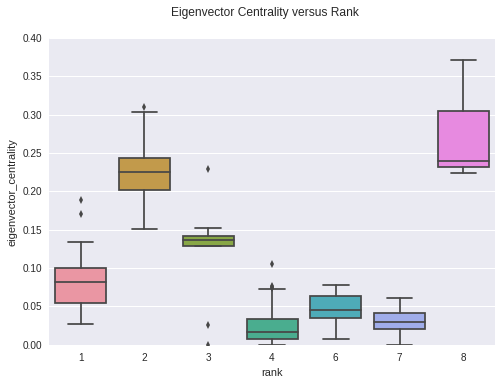

In [11]:
ax = sns.boxplot(x='rank',y='eigenvector_centrality',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Eigenvector Centrality versus Rank') 

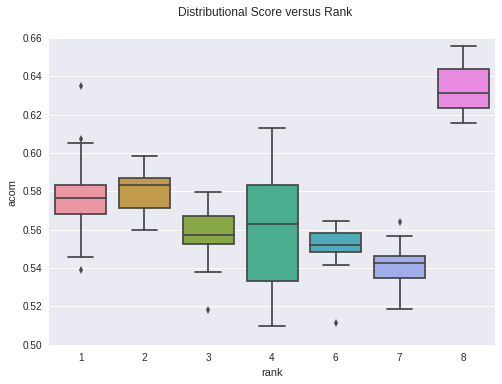

In [12]:
ax = sns.boxplot(x='rank',y='acom',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Distributional Score versus Rank') 

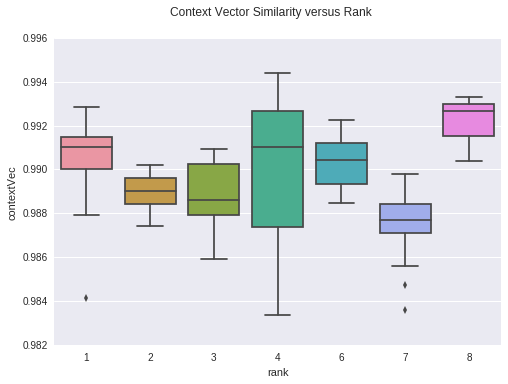

In [13]:
ax = sns.boxplot(x='rank',y='contextVec',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Context Vector Similarity versus Rank') 

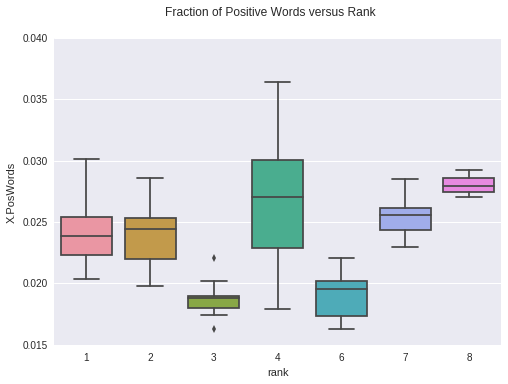

In [14]:
ax = sns.boxplot(x='rank',y='X.PosWords',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Fraction of Positive Words versus Rank') 

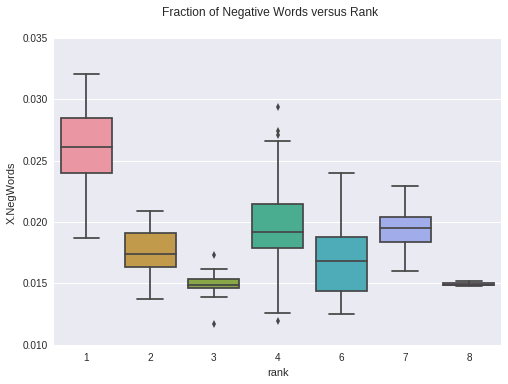

In [15]:
ax = sns.boxplot(x='rank',y='X.NegWords',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Fraction of Negative Words versus Rank')

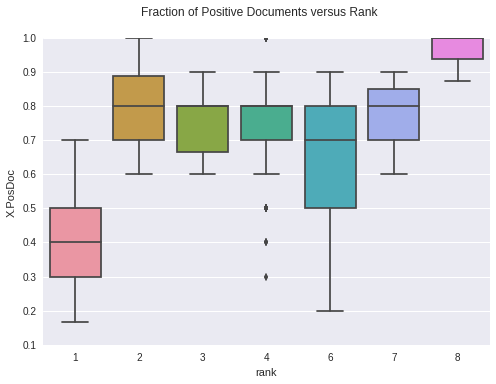

In [16]:
ax = sns.boxplot(x='rank',y='X.PosDoc',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Fraction of Positive Documents versus Rank') 

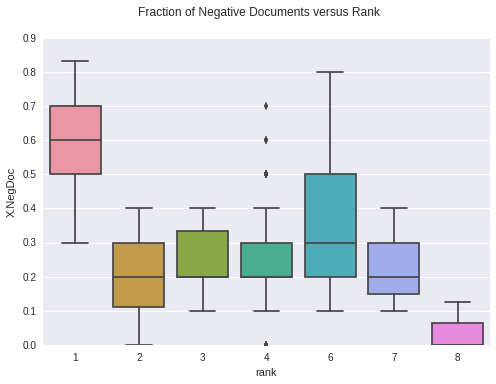

In [17]:
ax = sns.boxplot(x='rank',y='X.NegDoc',data=signalDF)
fig= ax.get_figure()
plt.suptitle('Fraction of Negative Documents versus Rank') 